# Curate External Datasets

Filter and transform external datasets based on analysis and save into curated folder

- The data will be filtered to metropolitan Melbourne regions, as that our area of focus
- The scale of our analysis is SA2/suburbs/postcodes

In [1]:
import os
import pandas as pd
import geopandas as gpd

## ABS

### GCCSA Boundary Shapefile

Read file

In [2]:
gccsa_sf = gpd.read_file("../data/raw/boundary/gccsa")

gccsa_sf.head()

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
0,1GSYD,Greater Sydney,0,No change,1,New South Wales,AUS,Australia,12368.6858,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((151.28159 -33.83318, 151.28151..."
1,1RNSW,Rest of NSW,0,No change,1,New South Wales,AUS,Australia,788428.9733,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ..."
2,19499,No usual address (NSW),0,No change,1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
3,19799,Migratory - Offshore - Shipping (NSW),0,No change,1,New South Wales,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."


Filter to GCCSAs in Victoria

In [3]:
gccsa_sf = gccsa_sf[gccsa_sf["ste_name"] == "Victoria"]

gccsa_sf

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,0,No change,2,Victoria,AUS,Australia,217503.6398,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
6,29499,No usual address (Vic.),0,No change,2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None
7,29799,Migratory - Offshore - Shipping (Vic.),0,No change,2,Victoria,AUS,Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/GCCS...,None


Discard the last two rows, as they are not relevant

In [4]:
gccsa_sf = gccsa_sf.drop([6,7])

gccsa_sf

,gcc_code,gcc_name,chg_flag,chg_lbl,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
4,2GMEL,Greater Melbourne,0,No change,2,Victoria,AUS,Australia,9992.6081,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,0,No change,2,Victoria,AUS,Australia,217503.6398,http://linked.data.gov.au/dataset/asgsed3/GCCS...,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."


Keep relevant columns (region identifiers and geometry)

In [5]:
gccsa_sf = gccsa_sf[["gcc_code", "gcc_name", "geometry"]]

gccsa_sf

,gcc_code,gcc_name,geometry
4,2GMEL,Greater Melbourne,"MULTIPOLYGON (((144.88829 -38.5026, 144.88825 ..."
5,2RVIC,Rest of Vic.,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."


Save into curated folder

In [6]:
output_dir = f"../data/curated/boundary/gccsa"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
gccsa_sf.to_file(f"{output_dir}/gccsa_boundary.shp")

### SA2

#### Boundary Shapefile

Read file

In [7]:
sa2_sf = gpd.read_file("../data/raw/boundary/sa2")

sa2_sf.head()

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.218 -35.366..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.1997 -35.35..."


Filter to SA2s in metropolitan Melbourne

In [8]:
sa2_sf = sa2_sf[sa2_sf["gcc_name"] == "Greater Melbourne"]

sa2_sf.head()

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
755,206011106,Brunswick East,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.1682,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76..."
756,206011107,Brunswick West,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,3.1795,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7..."
757,206011109,Pascoe Vale South,0,No change,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.9887,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7..."
758,206011495,Brunswick - North,1,New,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.4091,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7..."
759,206011496,Brunswick - South,1,New,20601,Brunswick - Coburg,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,2.7334,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7..."


Keep relevant columns (region identifiers, geometry, area). Since the scale of our analysis is SA2s/suburbs/postcodes, we can discard the other region columns

In [9]:
sa2_sf = sa2_sf[["sa2_code", "sa2_name", "areasqkm", "geometry"]]

sa2_sf.head()

,sa2_code,sa2_name,areasqkm,geometry
755,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76..."
756,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7..."
757,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7..."
758,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7..."
759,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7..."


Save into curated folder

In [10]:
output_dir = f"../data/curated/boundary/sa2"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
sa2_sf.to_file(f"{output_dir}/sa2_boundary.shp")

#### Income Data

Read file

In [11]:
income_df = pd.read_csv("../data/raw/sa2_income.csv")

income_df.head()

,sa2_code,sa2_name,earners,median_age_of_earners,sum,median,mean,p80/p20,p80/p50,p20/p50,p10/p50,gini_coefficient,top_1%,top_5%,top_10%,lowest_quartile,second_quartile,third_quartile,highest_quartile
0,Australia,NaN,14760008.0,42.0,1.040901e+12,54890.0,70522.0,5.00,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25.0,25.0,25.0,25.0
1,New South Wales,NaN,4603736.0,42.0,3.411075e+11,55854.0,74094.0,5.00,1.90,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
2,101021007,Braidwood,2467.0,51.0,1.699867e+08,46640.0,68904.0,6.84,2.05,0.30,0.07,0.615,21.2,32.6,42.7,31.8,24.3,21.7,22.2
3,101021008,Karabar,5103.0,42.0,3.555383e+08,65564.0,69672.0,3.37,1.57,0.47,0.23,0.365,4.4,14.5,24.1,17.8,22.6,32.9,26.7
4,101021009,Queanbeyan,7028.0,39.0,4.861574e+08,63528.0,69174.0,3.24,1.58,0.49,0.26,0.368,4.6,14.7,24.5,16.8,24.0,33.4,25.7


Use previous ABS datasets to determine which SA2s are within metropolitan Melbourne

In [12]:
sa2_metro_df = sa2_sf["sa2_code"]

sa2_metro_df.head()

755    206011106
756    206011107
757    206011109
758    206011495
759    206011496
Name: sa2_code, dtype: object

Filter to SA2s in metropolitan Melbourne

In [13]:
income_df = income_df[income_df["sa2_code"].isin(sa2_metro_df)]

income_df.head()

,sa2_code,sa2_name,earners,median_age_of_earners,sum,median,mean,p80/p20,p80/p50,p20/p50,p10/p50,gini_coefficient,top_1%,top_5%,top_10%,lowest_quartile,second_quartile,third_quartile,highest_quartile
756,206011106,Brunswick East,8921.0,34.0,703845159.0,67960.0,78898.0,4.21,1.71,0.41,0.20,0.418,6.0,17.4,28.0,19.3,21.0,25.9,33.8
757,206011107,Brunswick West,9353.0,36.0,686471144.0,60171.0,73396.0,4.60,1.83,0.40,0.18,0.445,6.7,19.0,29.9,22.1,23.9,25.3,28.7
758,206011109,Pascoe Vale South,6331.0,43.0,489833696.0,63813.0,77371.0,4.57,1.85,0.40,0.18,0.439,5.9,17.9,29.0,20.6,23.1,24.6,31.7
759,206011495,Brunswick - North,8740.0,35.0,661294326.0,61510.0,75663.0,4.59,1.84,0.40,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
760,206011496,Brunswick - South,9323.0,34.0,731086364.0,66877.0,78418.0,4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


Keep relevant columns (region identifiers, mean and median incomes)

In [14]:
income_df = income_df[["sa2_code", "sa2_name", "median", "mean"]]

income_df.head()

,sa2_code,sa2_name,median,mean
756,206011106,Brunswick East,67960.0,78898.0
757,206011107,Brunswick West,60171.0,73396.0
758,206011109,Pascoe Vale South,63813.0,77371.0
759,206011495,Brunswick - North,61510.0,75663.0
760,206011496,Brunswick - South,66877.0,78418.0


Save into curated folder

In [15]:
output_dir = f"../data/curated"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
income_df.to_csv(f"{output_dir}/sa2_income.csv", index = False)

#### Historical Population Data

Read file

In [16]:
population_df = pd.read_csv("../data/raw/sa2_population_hist.csv")

population_df.head()

,gcc_code,gcc_name,sa4_code,sa4_name,sa3_code,sa3_name,sa2_code,sa2_name,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,2760,2811,...,3762,3849,3950,4041,4145,4218,4282,4332,4366,4396
1,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,9129,9199,...,8731,8603,8531,8530,8516,8500,8535,8548,8528,8483
2,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,9717,9513,...,11199,11213,11230,11362,11460,11468,11460,11375,11391,11420
3,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,3925,4073,...,4967,4961,4970,5016,5079,5126,5089,5097,5091,5099
4,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,9425,10257,...,13193,13164,13150,13090,13022,12955,12821,12748,12781,12873


Filter to SA2s in metropolitan Melbourne

In [17]:
population_df = population_df[population_df["gcc_name"] == "Greater Melbourne"]

population_df.head()

,gcc_code,gcc_name,sa4_code,sa4_name,sa3_code,sa3_name,sa2_code,sa2_name,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
753,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011106,Brunswick East,7263,7304,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
754,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011107,Brunswick West,12415,12404,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
755,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011109,Pascoe Vale South,8841,8860,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
756,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011495,Brunswick - North,11278,11235,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
757,2GMEL,Greater Melbourne,206,Melbourne - Inner,20601,Brunswick - Coburg,206011496,Brunswick - South,9383,9671,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


Keep relevant columns (region identifiers, population estimates). Since the scale of our analysis is SA2s/suburbs/postcodes, we can discard the other region columns

In [18]:
# The last 25 columns are the SA2s and population estimates
population_df = population_df.iloc[:,-25:]

population_df.head()

,sa2_code,sa2_name,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
753,206011106,Brunswick East,7263,7304,7329,7514,7658,7803,8058,8313,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
754,206011107,Brunswick West,12415,12404,12449,12527,12609,12746,12946,13232,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
755,206011109,Pascoe Vale South,8841,8860,8894,8967,9070,9206,9318,9445,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
756,206011495,Brunswick - North,11278,11235,11210,11219,11237,11243,11364,11510,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
757,206011496,Brunswick - South,9383,9671,9805,9928,10147,10412,10780,11131,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


Save into curated folder

In [19]:
output_dir = f"../data/curated"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
population_df.to_csv(f"{output_dir}/sa2_population_hist.csv", index = False)

#### Merge Datasets

Check that `sa2_code` (the column we want to merge on) is the same type across datasets

In [20]:
sa2_sf["sa2_code"].dtype

dtype('O')

In [21]:
income_df["sa2_code"].dtype

dtype('O')

In [22]:
population_df["sa2_code"].dtype

dtype('int64')

Change column type to match

In [23]:
population_df["sa2_code"] = population_df["sa2_code"].astype(str)

population_df["sa2_code"].dtype

dtype('O')

Merge datasets

In [24]:
sa2_data_sf = sa2_sf.merge(income_df, how = "left")

sa2_data_sf.head()

,sa2_code,sa2_name,areasqkm,geometry,median,mean
0,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76...",67960.0,78898.0
1,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7...",60171.0,73396.0
2,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7...",63813.0,77371.0
3,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7...",61510.0,75663.0
4,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7...",66877.0,78418.0


In [25]:
sa2_data_sf = sa2_data_sf.merge(population_df, how = "left")

sa2_data_sf.head()

,sa2_code,sa2_name,areasqkm,geometry,median,mean,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76...",67960.0,78898.0,7263,7304,7329,7514,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
1,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7...",60171.0,73396.0,12415,12404,12449,12527,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
2,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7...",63813.0,77371.0,8841,8860,8894,8967,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
3,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7...",61510.0,75663.0,11278,11235,11210,11219,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
4,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7...",66877.0,78418.0,9383,9671,9805,9928,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


Rename columns for clarity

In [26]:
# List to hold new column names
new_cols = []

for col in sa2_data_sf.columns:
    
    # Columns with years represent populations
    if str.isnumeric(col):
        new_cols.append(col + "_pop")
    
    # "mean" and "median" columns represent income
    elif col in ["mean", "median"]:
        new_cols.append(col + "_inc")

    # No change to column name
    else:
        new_cols.append(col)

new_cols

['sa2_code',
 'sa2_name',
 'areasqkm',
 'geometry',
 'median_inc',
 'mean_inc',
 '2001_pop',
 '2002_pop',
 '2003_pop',
 '2004_pop',
 '2005_pop',
 '2006_pop',
 '2007_pop',
 '2008_pop',
 '2009_pop',
 '2010_pop',
 '2011_pop',
 '2012_pop',
 '2013_pop',
 '2014_pop',
 '2015_pop',
 '2016_pop',
 '2017_pop',
 '2018_pop',
 '2019_pop',
 '2020_pop',
 '2021_pop',
 '2022_pop',
 '2023_pop']

Assign new column names

In [27]:
sa2_data_sf.columns = new_cols

sa2_data_sf.columns

Index(['sa2_code', 'sa2_name', 'areasqkm', 'geometry', 'median_inc',
       'mean_inc', '2001_pop', '2002_pop', '2003_pop', '2004_pop', '2005_pop',
       '2006_pop', '2007_pop', '2008_pop', '2009_pop', '2010_pop', '2011_pop',
       '2012_pop', '2013_pop', '2014_pop', '2015_pop', '2016_pop', '2017_pop',
       '2018_pop', '2019_pop', '2020_pop', '2021_pop', '2022_pop', '2023_pop'],
      dtype='object')

Since our analysis is about rental properties, locations with population of 0 can be discarded

In [28]:
sa2_data_sf = sa2_data_sf[sa2_data_sf["2023_pop"] > 0]

sa2_data_sf.head()

,sa2_code,sa2_name,areasqkm,geometry,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,...,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop
0,206011106,Brunswick East,2.1682,"POLYGON ((144.97307 -37.76386, 144.9734 -37.76...",67960.0,78898.0,7263,7304,7329,7514,...,10439,11062,11716,12154,12392,12602,13064,12964,13309,13765
1,206011107,Brunswick West,3.1795,"POLYGON ((144.93408 -37.75968, 144.93406 -37.7...",60171.0,73396.0,12415,12404,12449,12527,...,14192,14344,14523,14556,14695,14854,15010,14497,14697,15196
2,206011109,Pascoe Vale South,2.9887,"POLYGON ((144.93265 -37.74225, 144.93251 -37.7...",63813.0,77371.0,8841,8860,8894,8967,...,10122,10251,10465,10698,10834,10873,10836,10463,10420,10628
3,206011495,Brunswick - North,2.4091,"POLYGON ((144.95031 -37.75808, 144.95045 -37.7...",61510.0,75663.0,11278,11235,11210,11219,...,12922,13225,13581,13728,13928,14022,14124,13077,13266,14057
4,206011496,Brunswick - South,2.7334,"POLYGON ((144.94986 -37.77014, 144.94929 -37.7...",66877.0,78418.0,9383,9671,9805,9928,...,13233,13574,13854,13984,14200,14336,14235,13208,13378,14273


Save into curated folder

In [29]:
output_dir = f"../data/curated/sa2_data"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
sa2_data_sf.to_file(f"{output_dir}/sa2_data.shp")

### Postal Areas

#### Boundary Shapefile

Read file

In [30]:
postcode_sf = gpd.read_file("../data/raw/boundary/postcode")

postcode_sf

,poa_code,poa_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.8368 -12.45378, 130.83683 -12.45..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89985 -12.36568, 130.89874 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278789,0.002983,"POLYGON ((130.91914 -12.40788, 130.9183 -12.40..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.8526 -12.43995, 130.85088 -12.43..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601833,12.564239,"MULTIPOLYGON (((136.56647 -12.08393, 136.56703..."
...,...,...,...,...,...,...,...,...,...
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341556,0.636169,"MULTIPOLYGON (((144.79215 -41.46479, 144.79211..."
2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725,"POLYGON ((145.57768 -41.78641, 145.57686 -41.7..."
2641,9494,No usual address (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None
2642,9797,Migratory - Offshore - Shipping (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None


The last three rows contain no information and can be discarded

In [31]:
postcode_sf = postcode_sf.drop([2641, 2642, 2643])

postcode_sf.tail()

,poa_code,poa_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
2636,7466,7466,AUS,Australia,68.8166,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.737044,0.007487,"POLYGON ((145.58775 -42.06032, 145.5875 -42.05..."
2637,7467,7467,AUS,Australia,144.0971,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.765625,0.015677,"POLYGON ((145.58257 -42.00062, 145.58265 -42.0..."
2638,7468,7468,AUS,Australia,309.9494,http://linked.data.gov.au/dataset/asgsed3/POA/...,2.114872,0.033768,"MULTIPOLYGON (((145.39701 -42.13913, 145.39773..."
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341556,0.636169,"MULTIPOLYGON (((144.79215 -41.46479, 144.79211..."
2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725,"POLYGON ((145.57768 -41.78641, 145.57686 -41.7..."


Filter to postcodes in Victoria (Victorian postcodes start with `3---`)

In [32]:
postcode_sf["poa_code"].dtype

dtype('O')

In [33]:
# Convert str to int
postcode_sf["poa_code"] = postcode_sf["poa_code"].astype(int)

postcode_sf["poa_code"].dtype

dtype('int64')

In [34]:
postcode_sf = postcode_sf[(postcode_sf["poa_code"] >= 3000) & (postcode_sf["poa_code"] <= 3999)]

postcode_sf.head()

,poa_code,poa_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
672,3000,3000,AUS,Australia,2.4814,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.083491,0.000254,"POLYGON ((144.96138 -37.82051, 144.96062 -37.8..."
673,3002,3002,AUS,Australia,1.8557,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.059488,0.000190,"POLYGON ((144.98978 -37.81907, 144.98973 -37.8..."
674,3003,3003,AUS,Australia,6.5822,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.139928,0.000673,"POLYGON ((144.95267 -37.81282, 144.95191 -37.8..."
675,3004,3004,AUS,Australia,4.0421,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.137947,0.000414,"POLYGON ((144.98 -37.84423, 144.98031 -37.8450..."
676,3006,3006,AUS,Australia,1.8542,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.066882,0.000190,"POLYGON ((144.96138 -37.82051, 144.96303 -37.8..."


Keep relevant columns (region identifiers, geometry, area). `poa_code` and `poa_name` are the same, so we only need to keep one

In [35]:
postcode_sf = postcode_sf[["poa_code", "areasqkm", "geometry"]]

postcode_sf.head()

,poa_code,areasqkm,geometry
672,3000,2.4814,"POLYGON ((144.96138 -37.82051, 144.96062 -37.8..."
673,3002,1.8557,"POLYGON ((144.98978 -37.81907, 144.98973 -37.8..."
674,3003,6.5822,"POLYGON ((144.95267 -37.81282, 144.95191 -37.8..."
675,3004,4.0421,"POLYGON ((144.98 -37.84423, 144.98031 -37.8450..."
676,3006,1.8542,"POLYGON ((144.96138 -37.82051, 144.96303 -37.8..."


Merge postcode geometries with GCCSA geometries to determine which postcodes are within metropolitan Melbourne

Check if the coordinate reference systems are the same before merging

In [36]:
postcode_sf.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
gccsa_sf.crs

<Geographic 2D CRS: GEOGCS["GCS_GDA2020",DATUM["Geocentric_Datum_of_Au ...>
Name: GCS_GDA2020
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Geocentric_Datum_of_Australia_2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Convert CRS

In [38]:
# EPSG:4326 is the most common global CRS in latitude and longitude and is used by GPS

postcode_sf["geometry"] = postcode_sf["geometry"].to_crs("EPSG:4326")

gccsa_sf["geometry"] = gccsa_sf["geometry"].to_crs("EPSG:4326")

/home/vyxian/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
postcode_sf.crs == gccsa_sf.crs

True

Join datasets by performing a spatial overlay

In [40]:
post_gcc_sf = gpd.overlay(postcode_sf, gccsa_sf, how = "intersection", keep_geom_type = False)

post_gcc_sf.head()

,poa_code,areasqkm,gcc_code,gcc_name,geometry
0,3000,2.4814,2GMEL,Greater Melbourne,"POLYGON ((144.96062 -37.82075, 144.96 -37.8210..."
1,3002,1.8557,2GMEL,Greater Melbourne,"POLYGON ((144.98973 -37.81934, 144.98972 -37.8..."
2,3003,6.5822,2GMEL,Greater Melbourne,"POLYGON ((144.95191 -37.81303, 144.95144 -37.8..."
3,3004,4.0421,2GMEL,Greater Melbourne,"POLYGON ((144.98031 -37.84506, 144.98036 -37.8..."
4,3006,1.8542,2GMEL,Greater Melbourne,"POLYGON ((144.96303 -37.8201, 144.96368 -37.81..."


Check for postcodes that are labelled as both regional and metropolitan

In [41]:
post_gcc_sf.groupby("poa_code").count().sort_values("gcc_name", ascending = False).head(10)

,areasqkm,gcc_code,gcc_name,geometry
poa_code,,,,
3778,2,2,2,2
3435,2,2,2,2
3030,2,2,2,2
3434,2,2,2,2
3777,2,2,2,2
3797,2,2,2,2
3818,2,2,2,2
3816,2,2,2,2
3815,2,2,2,2


Take a closer look at one of the postcodes

In [42]:
post_gcc_sf[post_gcc_sf["poa_code"] == 3778]

,poa_code,areasqkm,gcc_code,gcc_name,geometry
571,3778,220.4256,2GMEL,Greater Melbourne,"MULTIPOLYGON (((145.70162 -37.61154, 145.70192..."
572,3778,220.4256,2RVIC,Rest of Vic.,"POLYGON ((145.67656 -37.48261, 145.67634 -37.4..."


It is possible that the part of the postcode lies in regional Melbourne, and the other part lies in metropolitan Melbourne

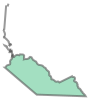

In [43]:
post_gcc_sf.iloc[571].geometry

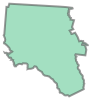

In [44]:
post_gcc_sf.iloc[572].geometry

By plotting the geometries, it seems like the postcode is in both regional and metropolitan Melbourne

Use the `geometry` column to calculate the areas of each overlapping region, and see if they are reasonable

The CRS has to be converted to a projected one before areas can be calculated. `EPSG:3112` was chosen because its area of use is Australia

In [45]:
# Convert CRS
post_gcc_sf["geometry"] = post_gcc_sf["geometry"].to_crs("EPSG:3112")

# Calculate area of overlaid regions
post_gcc_sf["ov_area"] = post_gcc_sf.geometry.area / (1000 * 1000)  # Convert to sqkm

post_gcc_sf.head()

,poa_code,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,3000,2.4814,2GMEL,Greater Melbourne,"POLYGON ((969348.283 -4295347.992, 969290.771 ...",2.509838
1,3002,1.8557,2GMEL,Greater Melbourne,"POLYGON ((971929.613 -4295415.714, 971928.818 ...",1.876931
2,3003,6.5822,2GMEL,Greater Melbourne,"POLYGON ((968654.595 -4294422.183, 968611.535 ...",6.657325
3,3004,4.0421,2GMEL,Greater Melbourne,"POLYGON ((970847.909 -4298203.327, 970852.824 ...",4.088925
4,3006,1.8542,2GMEL,Greater Melbourne,"POLYGON ((969566.872 -4295293.933, 969626.454 ...",1.875835


Check magnitude of areas

In [46]:
post_gcc_sf.sort_values("ov_area").head()

,poa_code,areasqkm,gcc_code,gcc_name,geometry,ov_area
341,3434,167.1149,2RVIC,Rest of Vic.,"POLYGON ((965321.713 -4239628.837, 965310.42 -...",0.000158
609,3818,279.6260,2GMEL,Greater Melbourne,"POLYGON ((1033147.841 -4349841.02, 1033217.386...",0.000214
723,3988,126.6841,2GMEL,Greater Melbourne,"POLYGON ((1032973.661 -4350604.669, 1033002.74...",0.000244
552,3757,285.4996,2RVIC,Rest of Vic.,"MULTIPOLYGON (((1001197.791 -4252239.335, 1001...",0.000376
554,3758,44.7055,2RVIC,Rest of Vic.,"MULTIPOLYGON (((980361.147 -4241115.863, 98036...",0.000396


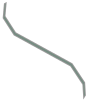

In [47]:
post_gcc_sf.iloc[341].geometry

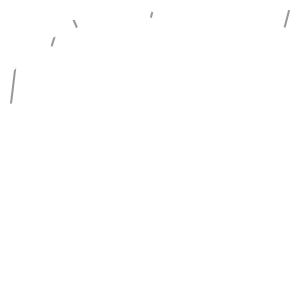

In [48]:
post_gcc_sf.iloc[554].geometry

By plotting geometries, we can see that some overlaid regions are extremely small and likely due to borders overlapping. Such regions should be filtered out

Filter out areas smaller than 1km^2

In [49]:
post_gcc_sf = post_gcc_sf[post_gcc_sf["ov_area"] > 1]

post_gcc_sf.head()

,poa_code,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,3000,2.4814,2GMEL,Greater Melbourne,"POLYGON ((969348.283 -4295347.992, 969290.771 ...",2.509838
1,3002,1.8557,2GMEL,Greater Melbourne,"POLYGON ((971929.613 -4295415.714, 971928.818 ...",1.876931
2,3003,6.5822,2GMEL,Greater Melbourne,"POLYGON ((968654.595 -4294422.183, 968611.535 ...",6.657325
3,3004,4.0421,2GMEL,Greater Melbourne,"POLYGON ((970847.909 -4298203.327, 970852.824 ...",4.088925
4,3006,1.8542,2GMEL,Greater Melbourne,"POLYGON ((969566.872 -4295293.933, 969626.454 ...",1.875835


We can now filter to postcodes in metropolitan Melbourne

In [50]:
post_gcc_sf = post_gcc_sf[post_gcc_sf["gcc_name"] == "Greater Melbourne"]

post_gcc_sf.head()

,poa_code,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,3000,2.4814,2GMEL,Greater Melbourne,"POLYGON ((969348.283 -4295347.992, 969290.771 ...",2.509838
1,3002,1.8557,2GMEL,Greater Melbourne,"POLYGON ((971929.613 -4295415.714, 971928.818 ...",1.876931
2,3003,6.5822,2GMEL,Greater Melbourne,"POLYGON ((968654.595 -4294422.183, 968611.535 ...",6.657325
3,3004,4.0421,2GMEL,Greater Melbourne,"POLYGON ((970847.909 -4298203.327, 970852.824 ...",4.088925
4,3006,1.8542,2GMEL,Greater Melbourne,"POLYGON ((969566.872 -4295293.933, 969626.454 ...",1.875835


Keep relevant columns (region identifier, geometry, area). Since all postcodes are now in metropolitan Melbourne, we can discard the other region columns

In [51]:
post_gcc_sf = post_gcc_sf.drop(columns = ["gcc_code", "gcc_name", "ov_area"])

# Convert CRS back to geographic 
post_gcc_sf["geometry"] = post_gcc_sf["geometry"].to_crs("EPSG:4326")

post_gcc_sf.head()

,poa_code,areasqkm,geometry
0,3000,2.4814,"POLYGON ((144.96062 -37.82075, 144.96 -37.8210..."
1,3002,1.8557,"POLYGON ((144.98973 -37.81934, 144.98972 -37.8..."
2,3003,6.5822,"POLYGON ((144.95191 -37.81303, 144.95144 -37.8..."
3,3004,4.0421,"POLYGON ((144.98031 -37.84506, 144.98036 -37.8..."
4,3006,1.8542,"POLYGON ((144.96303 -37.8201, 144.96368 -37.81..."


Save into curated folder

In [52]:
output_dir = f"../data/curated/boundary/postcode"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
post_gcc_sf.to_file(f"{output_dir}/postcode_boundary.shp")

#### Merge with SA2 Data

Check if the coordinate reference systems are the same before merging

In [53]:
post_gcc_sf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
sa2_data_sf.crs

<Geographic 2D CRS: GEOGCS["GCS_GDA2020",DATUM["Geocentric_Datum_of_Au ...>
Name: GCS_GDA2020
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Geocentric_Datum_of_Australia_2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [55]:
# EPSG:4326 is the most common global CRS in latitude and longitude and is used by GPS

post_gcc_sf["geometry"] = post_gcc_sf["geometry"].to_crs("EPSG:4326")

sa2_data_sf["geometry"] = sa2_data_sf["geometry"].to_crs("EPSG:4326")

In [56]:
post_gcc_sf.crs == sa2_data_sf.crs

True

Join datasets by performing a spatial overlay

In [57]:
post_sa2_sf = gpd.overlay(post_gcc_sf, sa2_data_sf, how = "intersection", keep_geom_type = False)

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry
0,3000,2.4814,206041117,Carlton,1.8187,40122.0,60736.0,9529,10022,10611,...,18983,20242,20651,20831,21029,20865,17064,18057,21376,"POLYGON ((144.95883 -37.79986, 144.95868 -37.8..."
1,3000,2.4814,206041118,Docklands,2.4440,62178.0,78910.0,154,926,1913,...,10444,11832,13922,15436,16369,16671,15905,16491,17723,"POLYGON ((144.95573 -37.82252, 144.95536 -37.8..."
2,3000,2.4814,206041119,East Melbourne,2.8998,81648.0,143914.0,3731,3859,4243,...,5411,5475,5496,5412,5416,5383,4959,4889,5100,"POLYGON ((144.97487 -37.81529, 144.97474 -37.8..."
3,3000,2.4814,206041124,Parkville,4.0491,49344.0,72917.0,5332,5327,5253,...,7682,7898,8182,8242,8291,8318,7428,7475,8003,"POLYGON ((144.95745 -37.80059, 144.95756 -37.7..."
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,40810.0,74664.0,3997,4794,5457,...,11049,11633,11881,12322,12530,12346,10119,10687,12408,"POLYGON ((144.96734 -37.80713, 144.96805 -37.8..."


Use the `geometry` column to calculate the areas of each overlapping region, and see if they are reasonable

The coordinate reference system has to be converted to a projected one before areas can be calculated. `EPSG:3112` was chosen as its area of use is Australia

In [58]:
# Convert CRS
post_sa2_sf["geometry"] = post_sa2_sf["geometry"].to_crs("EPSG:3112")

# Calculate area of overlaid regions
post_sa2_sf["ov_area"] = post_sa2_sf.geometry.area / (1000 * 1000)  # Convert to sqkm

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area
0,3000,2.4814,206041117,Carlton,1.8187,40122.0,60736.0,9529,10022,10611,...,20242,20651,20831,21029,20865,17064,18057,21376,"POLYGON ((969393.238 -4293010.767, 969371.409 ...",0.069813
1,3000,2.4814,206041118,Docklands,2.4440,62178.0,78910.0,154,926,1913,...,11832,13922,15436,16369,16671,15905,16491,17723,"POLYGON ((968899.951 -4295506.629, 968874.634 ...",0.001171
2,3000,2.4814,206041119,East Melbourne,2.8998,81648.0,143914.0,3731,3859,4243,...,5475,5496,5412,5416,5383,4959,4889,5100,"POLYGON ((970658.072 -4294850.246, 970646.592 ...",0.000838
3,3000,2.4814,206041124,Parkville,4.0491,49344.0,72917.0,5332,5327,5253,...,7898,8182,8242,8291,8318,7428,7475,8003,"POLYGON ((969264.279 -4293080.756, 969282.262 ...",0.000078
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,40810.0,74664.0,3997,4794,5457,...,11633,11881,12322,12530,12346,10119,10687,12408,"POLYGON ((970073.691 -4293885.144, 970135.066 ...",0.809325


Check magnitude of areas

In [59]:
post_sa2_sf.sort_values("ov_area").head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area
1566,3941,24.3906,214021384,Rosebud - McCrae,23.7957,43581.0,52672.0,18458,18563,18586,...,21613,22006,22343,22649,22938,23149,22986,23108,"POLYGON ((955421.704 -4355500.634, 955408.206 ...",4.542822e-08
291,3047,11.4857,210031439,Gowanbrae,1.5225,61196.0,71606.0,526,1001,1355,...,3042,3092,3120,3139,3156,3141,3134,3191,"POLYGON ((966073.116 -4280862.847, 966073.505 ...",1.546072e-07
98,3022,2.1307,213011336,Sunshine,4.7320,47031.0,55450.0,7980,8032,8093,...,10241,10303,10318,10306,10100,9568,9629,9940,"POLYGON ((956883.893 -4290160.912, 956883.488 ...",1.557978e-07
598,3101,10.4848,206071518,Richmond - North,1.9233,69865.0,83823.0,10156,10267,10340,...,14266,14546,14771,15077,15025,14074,14073,14884,"POLYGON ((974265.092 -4294814.224, 974265.618 ...",1.923339e-07
1460,3806,45.7677,212031559,Cranbourne North - East,5.4545,55113.0,61551.0,13,24,41,...,8723,9936,11050,11982,12658,12925,13271,13578,"POLYGON ((999847.157 -4326512.553, 999847.522 ...",4.492373e-07


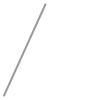

In [60]:
post_sa2_sf.iloc[1566].geometry

By plotting geometries, we can see that some overlaid regions are extremely small and likely due to borders overlapping. Such regions should be filtered out

Filter out areas smaller than 0.05 km^2 (50 000 m^2)

In [61]:
post_sa2_sf = post_sa2_sf[post_sa2_sf["ov_area"] > 0.05]

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area
0,3000,2.4814,206041117,Carlton,1.8187,40122.0,60736.0,9529,10022,10611,...,20242,20651,20831,21029,20865,17064,18057,21376,"POLYGON ((969393.238 -4293010.767, 969371.409 ...",0.069813
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,40810.0,74664.0,3997,4794,5457,...,11633,11881,12322,12530,12346,10119,10687,12408,"POLYGON ((970073.691 -4293885.144, 970135.066 ...",0.809325
5,3000,2.4814,206041504,Melbourne CBD - North,0.5616,29100.0,44257.0,1657,2282,2969,...,14230,15801,17131,18365,19155,17360,18876,21566,"POLYGON ((969182.047 -4293680.341, 969281.3 -4...",0.566776
6,3000,2.4814,206041505,Melbourne CBD - West,1.0051,39300.0,59201.0,1990,2516,2974,...,14318,16888,18101,18750,18796,16098,17343,20027,"POLYGON ((968654.595 -4294422.183, 968724.25 -...",1.016112
10,3002,1.8557,206041119,East Melbourne,2.8998,81648.0,143914.0,3731,3859,4243,...,5475,5496,5412,5416,5383,4959,4889,5100,"POLYGON ((971928.818 -4295420.039, 971924.262 ...",1.876033


Since some postcodes are made up of multiple SA2s with different statistics, we will calculate the percentage of the postcode taken up by each SA2 use that to take a weighted sum of the statistics

In [62]:
post_sa2_sf["ov_percent"] = post_sa2_sf["ov_area"] / post_sa2_sf["areasqkm_1"]

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,ov_percent
0,3000,2.4814,206041117,Carlton,1.8187,40122.0,60736.0,9529,10022,10611,...,20651,20831,21029,20865,17064,18057,21376,"POLYGON ((969393.238 -4293010.767, 969371.409 ...",0.069813,0.028134
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,40810.0,74664.0,3997,4794,5457,...,11881,12322,12530,12346,10119,10687,12408,"POLYGON ((970073.691 -4293885.144, 970135.066 ...",0.809325,0.326156
5,3000,2.4814,206041504,Melbourne CBD - North,0.5616,29100.0,44257.0,1657,2282,2969,...,15801,17131,18365,19155,17360,18876,21566,"POLYGON ((969182.047 -4293680.341, 969281.3 -4...",0.566776,0.228410
6,3000,2.4814,206041505,Melbourne CBD - West,1.0051,39300.0,59201.0,1990,2516,2974,...,16888,18101,18750,18796,16098,17343,20027,"POLYGON ((968654.595 -4294422.183, 968724.25 -...",1.016112,0.409492
10,3002,1.8557,206041119,East Melbourne,2.8998,81648.0,143914.0,3731,3859,4243,...,5496,5412,5416,5383,4959,4889,5100,"POLYGON ((971928.818 -4295420.039, 971924.262 ...",1.876033,1.010957


Calculate the number of SA2s that make up each postcode

In [63]:
post_sa2_counts = post_sa2_sf[["poa_code"]].value_counts()

post_sa2_counts

poa_code
3029        10
3064         9
3977         9
3023         8
3030         8
            ..
3929         1
3930         1
3933         1
3934         1
3936         1
Name: count, Length: 288, dtype: int64

In [64]:
post_sa2_sf["sa2_count"] = post_sa2_sf.apply(lambda x: (post_sa2_counts[x["poa_code"]]), axis = 1)

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,ov_percent,sa2_count
0,3000,2.4814,206041117,Carlton,1.8187,40122.0,60736.0,9529,10022,10611,...,20831,21029,20865,17064,18057,21376,"POLYGON ((969393.238 -4293010.767, 969371.409 ...",0.069813,0.028134,4
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,40810.0,74664.0,3997,4794,5457,...,12322,12530,12346,10119,10687,12408,"POLYGON ((970073.691 -4293885.144, 970135.066 ...",0.809325,0.326156,4
5,3000,2.4814,206041504,Melbourne CBD - North,0.5616,29100.0,44257.0,1657,2282,2969,...,17131,18365,19155,17360,18876,21566,"POLYGON ((969182.047 -4293680.341, 969281.3 -4...",0.566776,0.228410,4
6,3000,2.4814,206041505,Melbourne CBD - West,1.0051,39300.0,59201.0,1990,2516,2974,...,18101,18750,18796,16098,17343,20027,"POLYGON ((968654.595 -4294422.183, 968724.25 -...",1.016112,0.409492,4
10,3002,1.8557,206041119,East Melbourne,2.8998,81648.0,143914.0,3731,3859,4243,...,5412,5416,5383,4959,4889,5100,"POLYGON ((971928.818 -4295420.039, 971924.262 ...",1.876033,1.010957,1


Calculate weighted sum of values

In [65]:
pop_cols = ['2001_pop', '2002_pop', '2003_pop',
       '2004_pop', '2005_pop', '2006_pop', '2007_pop', '2008_pop', '2009_pop',
       '2010_pop', '2011_pop', '2012_pop', '2013_pop', '2014_pop', '2015_pop',
       '2016_pop', '2017_pop', '2018_pop', '2019_pop', '2020_pop', '2021_pop',
       '2022_pop', '2023_pop']

inc_cols = ["median_inc", "mean_inc"]

for col in pop_cols:
    # Scale population by percentage area  
    post_sa2_sf[col] = post_sa2_sf.apply(lambda x: (x["ov_percent"] * x[col]) 
                                       if (x["ov_percent"] < 1) 
                                       else x[col], axis = 1)

for col in inc_cols:
    # Scale income by percentage area if the suburb consists of more than one SA2
    post_sa2_sf[col] = post_sa2_sf.apply(lambda x: (x["ov_percent"] * x[col]) 
                                       if ((x["ov_percent"] < 1) & (x["sa2_count"] > 1)) 
                                       else x[col], axis = 1)

post_sa2_sf.head()

,poa_code,areasqkm_1,sa2_code,sa2_name,areasqkm_2,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,...,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,geometry,ov_area,ov_percent,sa2_count
0,3000,2.4814,206041117,Carlton,1.8187,1128.808491,1708.771060,268.092720,281.962980,298.534143,...,586.067735,591.638347,587.024305,480.085442,508.022903,601.400984,"POLYGON ((969393.238 -4293010.767, 969371.409 ...",0.069813,0.028134,4
4,3000,2.4814,206041503,Melbourne CBD - East,0.8020,13310.444470,24352.144717,1303.647306,1563.593991,1779.835714,...,4018.899700,4086.740240,4026.727455,3300.377054,3485.633914,4046.949154,"POLYGON ((970073.691 -4293885.144, 970135.066 ...",0.809325,0.326156,4
5,3000,2.4814,206041504,Melbourne CBD - North,0.5616,6646.718583,10108.722486,378.474663,521.230646,678.148023,...,3912.884400,4194.741814,4375.185377,3965.190193,4311.459106,4925.880858,"POLYGON ((969182.047 -4293680.341, 969281.3 -4...",0.566776,0.228410,4
6,3000,2.4814,206041505,Melbourne CBD - West,1.0051,16093.016417,24242.306995,814.888109,1030.280644,1217.827756,...,7412.205857,7677.965848,7696.802457,6591.994358,7101.811291,8200.886509,"POLYGON ((968654.595 -4294422.183, 968724.25 -...",1.016112,0.409492,4
10,3002,1.8557,206041119,East Melbourne,2.8998,81648.000000,143914.000000,3731.000000,3859.000000,4243.000000,...,5412.000000,5416.000000,5383.000000,4959.000000,4889.000000,5100.000000,"POLYGON ((971928.818 -4295420.039, 971924.262 ...",1.876033,1.010957,1


Drop columns we don't want to be summed, then sum the rest

In [66]:
post_sa2_sf = post_sa2_sf.drop(
    columns = ["areasqkm_1", "areasqkm_2", "sa2_code", "sa2_name", "geometry", "ov_area", "ov_percent", "sa2_count"])\
        .groupby("poa_code").sum()

post_sa2_sf.head()

,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop
poa_code,,,,,,,,,,,,,,,,,,,,,
3000,37178.987961,60411.945258,2765.102797,3397.068262,3974.345636,4412.431879,4941.097475,5325.229387,5663.613477,6035.585267,...,11354.612922,12495.778159,13477.042178,14980.660572,15930.057692,16551.086249,16685.739594,14337.647047,15406.927214,17775.117505
3002,81648.000000,143914.000000,3731.000000,3859.000000,4243.000000,4460.000000,4495.000000,4555.000000,4806.000000,5055.000000,...,5374.000000,5411.000000,5475.000000,5496.000000,5412.000000,5416.000000,5383.000000,4959.000000,4889.000000,5100.000000
3003,54727.000000,71654.000000,304.955783,316.330015,324.797498,347.293200,366.882154,388.240434,406.439204,432.094415,...,611.048990,660.084565,713.037932,768.898046,833.857546,896.163058,956.320104,962.259981,1014.328685,1102.542169
3004,50363.086890,88450.254623,5088.844744,5178.997566,5334.992916,5450.657248,5550.858261,5675.256296,5827.241666,5980.620954,...,6566.785866,6701.491026,6845.849645,6907.194692,6966.719729,7071.227782,7015.701782,6562.519012,6597.034656,6892.172627
3006,59140.287763,81728.074625,2290.647146,2871.845457,3516.970267,3995.514876,4406.416409,4748.339711,5118.449210,5431.213958,...,8101.692726,8668.023602,9402.343247,9996.228705,10736.100783,11333.692516,11575.097179,10805.634796,11308.459809,12219.221156


Calculate annual population growth rate (%) using post-COVID data (2021-2023)

In [67]:
post_sa2_sf["pop_growth"] = (pow(post_sa2_sf["2023_pop"] / post_sa2_sf["2021_pop"], 1/2) - 1) * 100

post_sa2_sf.head()

,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,pop_growth
poa_code,,,,,,,,,,,,,,,,,,,,,
3000,37178.987961,60411.945258,2765.102797,3397.068262,3974.345636,4412.431879,4941.097475,5325.229387,5663.613477,6035.585267,...,12495.778159,13477.042178,14980.660572,15930.057692,16551.086249,16685.739594,14337.647047,15406.927214,17775.117505,11.344123
3002,81648.000000,143914.000000,3731.000000,3859.000000,4243.000000,4460.000000,4495.000000,4555.000000,4806.000000,5055.000000,...,5411.000000,5475.000000,5496.000000,5412.000000,5416.000000,5383.000000,4959.000000,4889.000000,5100.000000,1.411693
3003,54727.000000,71654.000000,304.955783,316.330015,324.797498,347.293200,366.882154,388.240434,406.439204,432.094415,...,660.084565,713.037932,768.898046,833.857546,896.163058,956.320104,962.259981,1014.328685,1102.542169,7.041304
3004,50363.086890,88450.254623,5088.844744,5178.997566,5334.992916,5450.657248,5550.858261,5675.256296,5827.241666,5980.620954,...,6701.491026,6845.849645,6907.194692,6966.719729,7071.227782,7015.701782,6562.519012,6597.034656,6892.172627,2.480866
3006,59140.287763,81728.074625,2290.647146,2871.845457,3516.970267,3995.514876,4406.416409,4748.339711,5118.449210,5431.213958,...,8668.023602,9402.343247,9996.228705,10736.100783,11333.692516,11575.097179,10805.634796,11308.459809,12219.221156,6.339991


Re-join postcode area and geometry

In [68]:
post_sa2_sf = post_sa2_sf.merge(postcode_sf[["poa_code", "areasqkm", "geometry"]], on = "poa_code")

post_sa2_sf.head()

,poa_code,median_inc,mean_inc,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,...,2017_pop,2018_pop,2019_pop,2020_pop,2021_pop,2022_pop,2023_pop,pop_growth,areasqkm,geometry
0,3000,37178.987961,60411.945258,2765.102797,3397.068262,3974.345636,4412.431879,4941.097475,5325.229387,5663.613477,...,14980.660572,15930.057692,16551.086249,16685.739594,14337.647047,15406.927214,17775.117505,11.344123,2.4814,"POLYGON ((144.96138 -37.82051, 144.96062 -37.8..."
1,3002,81648.000000,143914.000000,3731.000000,3859.000000,4243.000000,4460.000000,4495.000000,4555.000000,4806.000000,...,5496.000000,5412.000000,5416.000000,5383.000000,4959.000000,4889.000000,5100.000000,1.411693,1.8557,"POLYGON ((144.98978 -37.81907, 144.98973 -37.8..."
2,3003,54727.000000,71654.000000,304.955783,316.330015,324.797498,347.293200,366.882154,388.240434,406.439204,...,768.898046,833.857546,896.163058,956.320104,962.259981,1014.328685,1102.542169,7.041304,6.5822,"POLYGON ((144.95267 -37.81282, 144.95191 -37.8..."
3,3004,50363.086890,88450.254623,5088.844744,5178.997566,5334.992916,5450.657248,5550.858261,5675.256296,5827.241666,...,6907.194692,6966.719729,7071.227782,7015.701782,6562.519012,6597.034656,6892.172627,2.480866,4.0421,"POLYGON ((144.98 -37.84423, 144.98031 -37.8450..."
4,3006,59140.287763,81728.074625,2290.647146,2871.845457,3516.970267,3995.514876,4406.416409,4748.339711,5118.449210,...,9996.228705,10736.100783,11333.692516,11575.097179,10805.634796,11308.459809,12219.221156,6.339991,1.8542,"POLYGON ((144.96138 -37.82051, 144.96303 -37.8..."


Convert into shapefile and save into curated folder

In [69]:
post_sa2_sf = gpd.GeoDataFrame(post_sa2_sf, crs="EPSG:4326")

output_dir = f"../data/curated/postcode_data"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
post_sa2_sf.to_file(f"{output_dir}/postcode_data.shp")

### Suburbs and Localities

#### Boundary Shapefile

Read file

In [70]:
suburb_sf = gpd.read_file("../data/raw/boundary/suburb")

suburb_sf.head()

,sal_code,sal_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
0,10001,Aarons Pass,1,New South Wales,AUS,Australia,82.7639,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.554241,0.007975,"POLYGON ((149.82477 -32.84384, 149.83271 -32.8..."
1,10002,Abbotsbury,1,New South Wales,AUS,Australia,4.9788,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.123051,0.000485,"POLYGON ((150.86523 -33.88264, 150.86479 -33.8..."
2,10003,Abbotsford (NSW),1,New South Wales,AUS,Australia,1.0180,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.053423,0.000099,"POLYGON ((151.13472 -33.85492, 151.13445 -33.8..."
3,10004,Abercrombie,1,New South Wales,AUS,Australia,2.9775,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.097338,0.000289,"POLYGON ((149.55192 -33.3928, 149.55148 -33.39..."
4,10005,Abercrombie River,1,New South Wales,AUS,Australia,127.1701,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.848903,0.012397,"POLYGON ((149.25562 -33.96535, 149.25563 -33.9..."


Filter to suburbs in Victoria

In [71]:
suburb_sf = suburb_sf[suburb_sf["ste_name"] == "Victoria"]

suburb_sf

,sal_code,sal_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
4544,20001,Abbeyard,2,Victoria,AUS,Australia,327.5008,http://linked.data.gov.au/dataset/asgsed3/SAL/...,1.207678,0.033162,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),2,Victoria,AUS,Australia,1.7405,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.092990,0.000178,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,2,Victoria,AUS,Australia,1.5515,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.059374,0.000159,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,2,Victoria,AUS,Australia,10.8319,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.183199,0.001107,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,2,Victoria,AUS,Australia,72.6602,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.514040,0.007381,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."
...,...,...,...,...,...,...,...,...,...,...,...
7485,22942,Yuulong,2,Victoria,AUS,Australia,52.1657,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.447416,0.005404,"POLYGON ((143.32185 -38.68969, 143.32203 -38.6..."
7486,22943,Zeerust,2,Victoria,AUS,Australia,18.0294,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.211342,0.001808,"POLYGON ((145.40454 -36.25294, 145.40479 -36.2..."
7487,22944,Zumsteins,2,Victoria,AUS,Australia,256.5582,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.810459,0.026011,"POLYGON ((142.48512 -37.15733, 142.48443 -37.1..."
7488,29494,No usual address (Vic.),2,Victoria,AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.000000,0.000000,None


The last two rows contain no information and can be discarded

In [72]:
suburb_sf = suburb_sf.drop([7488,7489])

suburb_sf.tail()

,sal_code,sal_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,shape_leng,shape_area,geometry
7483,22940,Yundool,2,Victoria,AUS,Australia,31.6396,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.256626,0.003174,"POLYGON ((145.8604 -36.28432, 145.86038 -36.29..."
7484,22941,Yuroke,2,Victoria,AUS,Australia,8.8851,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.158951,0.000906,"POLYGON ((144.8525 -37.558, 144.85303 -37.5583..."
7485,22942,Yuulong,2,Victoria,AUS,Australia,52.1657,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.447416,0.005404,"POLYGON ((143.32185 -38.68969, 143.32203 -38.6..."
7486,22943,Zeerust,2,Victoria,AUS,Australia,18.0294,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.211342,0.001808,"POLYGON ((145.40454 -36.25294, 145.40479 -36.2..."
7487,22944,Zumsteins,2,Victoria,AUS,Australia,256.5582,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.810459,0.026011,"POLYGON ((142.48512 -37.15733, 142.48443 -37.1..."


Keep relevant columns (region identifiers, geometry, area)

In [73]:
suburb_sf = suburb_sf[["sal_code", "sal_name", "areasqkm", "geometry"]]

suburb_sf.head()

,sal_code,sal_name,areasqkm,geometry
4544,20001,Abbeyard,327.5008,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,1.5515,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,10.8319,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,72.6602,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."


Merge suburb geometries with GCCSA geometries to determine which suburbs are within metropolitan Melbourne

Check if the coordinate reference systems are the same before merging

In [74]:
suburb_sf.crs

<Geographic 2D CRS: GEOGCS["GCS_GDA2020",DATUM["Geocentric_Datum_of_Au ...>
Name: GCS_GDA2020
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Geocentric_Datum_of_Australia_2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [75]:
gccsa_sf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Convert CRS

In [76]:
# EPSG:4326 is the most common global CRS in latitude and longitude and is used by GPS

suburb_sf["geometry"] = suburb_sf["geometry"].to_crs("EPSG:4326")

gccsa_sf["geometry"] = gccsa_sf["geometry"].to_crs("EPSG:4326")

/home/vyxian/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Join datasets by performing a spatial overlay

In [77]:
sub_gcc_sf = gpd.overlay(suburb_sf, gccsa_sf, how = "intersection", keep_geom_type = False)

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((146.89947 -37.04866, 146.89938 -37.0..."
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79..."
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7..."
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((146.38808 -37.72224, 146.38876 -37.7..."
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((145.76757 -37.26055, 145.76746 -37.2..."


Check for suburbs that are labelled as both regional and metropolitan

In [78]:
sub_gcc_sf.groupby("sal_name").count().sort_values("gcc_name", ascending = False).head(10)

,sal_code,areasqkm,gcc_code,gcc_name,geometry
sal_name,,,,,
Modella,2,2,2,2,2
Jam Jerrup,2,2,2,2,2
Ingliston,2,2,2,2,2
Wandong,2,2,2,2,2
Hopetoun Park,2,2,2,2,2
Hesket,2,2,2,2,2
Mount Macedon,2,2,2,2,2
Macedon,2,2,2,2,2
Broadford,2,2,2,2,2


Take a closer look at one of the suburbs

In [79]:
sub_gcc_sf[sub_gcc_sf["sal_name"] == "Mount Macedon"]

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry
1851,21801,Mount Macedon,34.0169,2GMEL,Greater Melbourne,"POLYGON ((144.62271 -37.39801, 144.62311 -37.4..."
1852,21801,Mount Macedon,34.0169,2RVIC,Rest of Vic.,"MULTIPOLYGON (((144.55099 -37.38231, 144.55134..."


It is possible that the part of the suburb lies in regional Melbourne, and the other part lies in metropolitan Melbourne

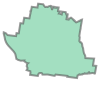

In [80]:
sub_gcc_sf.iloc[1851].geometry

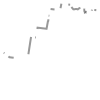

In [81]:
sub_gcc_sf.iloc[1852].geometry

By plotting the geometries, we can see that the overlapping regions of Mount Macedon and regional Melbourne is just parts of the border, and the suburb is actually in Greater Melbourne

Use the `geometry` column to calculate the areas of each overlapping region, and see if they are reasonable

The CRS has to be converted to a projected one before areas can be calculated. `EPSG:3112` was chosen as its area of use is Australia

In [82]:
# Convert CRS
sub_gcc_sf["geometry"] = sub_gcc_sf["geometry"].to_crs("EPSG:3112")

# Calculate area of overlaid regions
sub_gcc_sf["ov_area"] = sub_gcc_sf.geometry.area / (1000 * 1000)    # Convert to sqkm

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((1149080.003 -4226003.516, 1149071.10...",329.514690
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.87 -4292996.482, 973215.198 -...",1.760543
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964136.622 -4288681.434, 964105.375 ...",1.568921
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((1096288.449 -4296131.34, 1096350.921...",10.947534
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((1046354.038 -4239601.56, 1046343.956...",73.224774


Check magnitude of areas

In [83]:
sub_gcc_sf.sort_values("ov_area").head()

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
82,20081,Athlone,30.3600,2GMEL,Greater Melbourne,"POLYGON ((1033148.482 -4349839.608, 1033188.64...",3.464178e-09
530,20517,Catani,34.1766,2RVIC,Rest of Vic.,"MULTIPOLYGON (((1030884.584 -4344155.27, 10306...",5.522030e-09
1898,21847,Murrindindi,229.2223,2GMEL,Greater Melbourne,"POLYGON ((1021774.107 -4259312.82, 1022010.12 ...",9.453848e-09
2163,22100,Poowong North,31.1019,2GMEL,Greater Melbourne,"POLYGON ((1033148.482 -4349839.608, 1033148.48...",1.090536e-08
919,20899,Eynesbury,60.9402,2RVIC,Rest of Vic.,"POLYGON ((927110.794 -4287323.213, 927110.373 ...",1.297792e-08


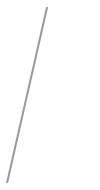

In [84]:
sub_gcc_sf.iloc[82].geometry

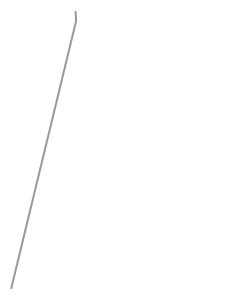

In [85]:
sub_gcc_sf.iloc[919].geometry

We know that some overlaid regions are due to borders overlapping and such regions should be filtered out

Filter out areas smaller than 0.05 km^2 (50 000 m^2)

In [86]:
sub_gcc_sf = sub_gcc_sf[sub_gcc_sf["ov_area"] > 0.05]

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
0,20001,Abbeyard,327.5008,2RVIC,Rest of Vic.,"POLYGON ((1149080.003 -4226003.516, 1149071.10...",329.514690
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.87 -4292996.482, 973215.198 -...",1.760543
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964136.622 -4288681.434, 964105.375 ...",1.568921
3,20004,Aberfeldy,10.8319,2RVIC,Rest of Vic.,"POLYGON ((1096288.449 -4296131.34, 1096350.921...",10.947534
4,20005,Acheron,72.6602,2RVIC,Rest of Vic.,"POLYGON ((1046354.038 -4239601.56, 1046343.956...",73.224774


We can now filter to suburbs in metropolitan Melbourne

In [87]:
sub_gcc_sf = sub_gcc_sf[sub_gcc_sf["gcc_name"] == "Greater Melbourne"]

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,gcc_code,gcc_name,geometry,ov_area
1,20002,Abbotsford (Vic.),1.7405,2GMEL,Greater Melbourne,"POLYGON ((973223.87 -4292996.482, 973215.198 -...",1.760543
2,20003,Aberfeldie,1.5515,2GMEL,Greater Melbourne,"POLYGON ((964136.622 -4288681.434, 964105.375 ...",1.568921
11,20011,Aintree,6.7302,2GMEL,Greater Melbourne,"POLYGON ((944616.335 -4282693.973, 944584.53 -...",6.803023
15,20015,Airport West,3.6748,2GMEL,Greater Melbourne,"POLYGON ((963266.193 -4283019.277, 963880.38 -...",3.715018
17,20017,Albanvale,1.8634,2GMEL,Greater Melbourne,"POLYGON ((953370.86 -4285027.746, 953562.708 -...",1.883807


Keep relevant columns (region identifier, geometry, area). Since all suburbs are in metropolitan Melbourne, we can discard the other region columns

In [88]:
sub_gcc_sf = sub_gcc_sf.drop(columns = ["gcc_code", "gcc_name", "ov_area"])

# Convert CRS back to geographic
sub_gcc_sf["geometry"] = sub_gcc_sf["geometry"].to_crs("EPSG:4326")

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,geometry
1,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79..."
2,20003,Aberfeldie,1.5515,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7..."
11,20011,Aintree,6.7302,"POLYGON ((144.67022 -37.72685, 144.66986 -37.7..."
15,20015,Airport West,3.6748,"POLYGON ((144.88016 -37.71544, 144.8867 -37.71..."
17,20017,Albanvale,1.8634,"POLYGON ((144.77088 -37.741, 144.77308 -37.741..."


Save into curated folder

In [89]:
output_dir = f"../data/curated/boundary/suburb"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
sub_gcc_sf.to_file(f"{output_dir}/suburb_boundary.shp")

#### Merge Suburbs and Postcodes

Join datasets by performing a spatial overlay

In [90]:
post_sub_sf = gpd.overlay(sub_gcc_sf, post_gcc_sf, keep_geom_type = False)

post_sub_sf.head()

,sal_code,sal_name,areasqkm_1,poa_code,areasqkm_2,geometry
0,20002,Abbotsford (Vic.),1.7405,3067,1.8302,"POLYGON ((145.0019 -37.79675, 145.00189 -37.79..."
1,20002,Abbotsford (Vic.),1.7405,3078,6.3555,"POLYGON ((145.0013 -37.79558, 145.0013 -37.795..."
2,20002,Abbotsford (Vic.),1.7405,3101,10.4848,"MULTIPOLYGON (((145.00182 -37.79692, 145.00182..."
3,20003,Aberfeldie,1.5515,3039,4.3551,"MULTIPOLYGON (((144.9044 -37.76, 144.9044 -37...."
4,20003,Aberfeldie,1.5515,3040,8.7364,"POLYGON ((144.89514 -37.76551, 144.89478 -37.7..."


Use the `geometry` column to calculate the areas of each overlapping region

The CRS has to be converted to a projected one before areas can be calculated. `EPSG:3112` was chosen because its area of use is Australia

In [91]:
# Convert CRS
post_sub_sf["geometry"] = post_sub_sf["geometry"].to_crs("EPSG:3112")

# Calculate area of overlaid regions
post_sub_sf["ov_area"] = post_sub_sf.geometry.area

post_sub_sf.head()

,sal_code,sal_name,areasqkm_1,poa_code,areasqkm_2,geometry,ov_area
0,20002,Abbotsford (Vic.),1.7405,3067,1.8302,"POLYGON ((973223.367 -4292997.626, 973223.218 ...",1.756405e+06
1,20002,Abbotsford (Vic.),1.7405,3078,6.3555,"POLYGON ((973182.08 -4292863.471, 973182.122 -...",1.475776e+02
2,20002,Abbotsford (Vic.),1.7405,3101,10.4848,"MULTIPOLYGON (((973215.198 -4293016.227, 97321...",3.990155e+03
3,20003,Aberfeldie,1.5515,3039,4.3551,"MULTIPOLYGON (((964976.206 -4288159.56, 964976...",4.829565e+02
4,20003,Aberfeldie,1.5515,3040,8.7364,"POLYGON ((964105.375 -4288701.238, 964071.74 -...",1.568438e+06


Assign each suburb to the postcode that takes up most of its area

Calculate largest area

In [92]:
max_area = post_sub_sf.groupby("sal_code")[["ov_area"]].max()

max_area.head()

,ov_area
sal_code,
20002,1.756405e+06
20003,1.568438e+06
20011,6.797616e+06
20015,3.711848e+06
20017,1.883184e+06


Add `max_area` to suburb data

In [93]:
sub_gcc_sf = sub_gcc_sf.merge(max_area, left_on = "sal_code", right_index = True) 

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,geometry,ov_area
1,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79...",1.756405e+06
2,20003,Aberfeldie,1.5515,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7...",1.568438e+06
11,20011,Aintree,6.7302,"POLYGON ((144.67022 -37.72685, 144.66986 -37.7...",6.797616e+06
15,20015,Airport West,3.6748,"POLYGON ((144.88016 -37.71544, 144.8867 -37.71...",3.711848e+06
17,20017,Albanvale,1.8634,"POLYGON ((144.77088 -37.741, 144.77308 -37.741...",1.883184e+06


Merge suburbs with postcodes using overlaid areas

In [94]:
sub_gcc_sf = sub_gcc_sf.merge(post_sub_sf[["ov_area", "poa_code"]], on = "ov_area")

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,geometry,ov_area,poa_code
0,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79...",1.756405e+06,3067
1,20003,Aberfeldie,1.5515,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7...",1.568438e+06,3040
2,20011,Aintree,6.7302,"POLYGON ((144.67022 -37.72685, 144.66986 -37.7...",6.797616e+06,3336
3,20015,Airport West,3.6748,"POLYGON ((144.88016 -37.71544, 144.8867 -37.71...",3.711848e+06,3042
4,20017,Albanvale,1.8634,"POLYGON ((144.77088 -37.741, 144.77308 -37.741...",1.883184e+06,3021


Keep relevant columns (region identifiers, geometry, suburb area)

In [95]:
sub_gcc_sf = sub_gcc_sf.drop(columns = "ov_area")

sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,geometry,poa_code
0,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79...",3067
1,20003,Aberfeldie,1.5515,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7...",3040
2,20011,Aintree,6.7302,"POLYGON ((144.67022 -37.72685, 144.66986 -37.7...",3336
3,20015,Airport West,3.6748,"POLYGON ((144.88016 -37.71544, 144.8867 -37.71...",3042
4,20017,Albanvale,1.8634,"POLYGON ((144.77088 -37.741, 144.77308 -37.741...",3021


In [96]:
output_dir = f"../data/curated/boundary/suburb_postcode"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
sub_gcc_sf.to_file(f"{output_dir}/suburb_postcode_boundary.shp")

## DFFH Suburb Historical Rent Data


Read file

In [97]:
rent_df = pd.read_csv("../data/raw/suburb_rent_hist.csv")

rent_df.head()

,gcc_name,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Inner Melbourne,Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,...,867,500,855,515,881,500,832,525,786,545
1,Inner Melbourne,Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,...,805,430,851,450,852,450,840,460,751,490
2,Inner Melbourne,Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,...,581,580,535,595,547,600,546,600,490,620
3,Inner Melbourne,Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
4,Inner Melbourne,CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,...,17845,365,16792,390,18284,419,17627,450,17426,500


Filter to suburbs in metropolitan Melbourne

In [98]:
rent_df.groupby("gcc_name").count()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
gcc_name,,,,,,,,,,,,,,,,,,,,,
Ballarat,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Bendigo,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Geelong,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Inner Eastern Melbourne,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Inner Melbourne,23,22,22,23,23,22,22,22,22,22,...,23,23,23,23,23,23,23,23,23,23
Mornington Peninsula,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
North Eastern Melbourne,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
North Western Melbourne,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Other Regional Centres,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


All areas except Ballarat, Bendigo, Geelong and Other Regional Centres are part of metropolitan Melbourne


In [99]:
# Filter to suburbs in metropolitan Melbourne
rent_df = rent_df[rent_df["gcc_name"].isin(["Ballarat", "Bendigo", "Geelong", "Other Regional Centres"]) == False]

rent_df.head()

,gcc_name,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Inner Melbourne,Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,...,867,500,855,515,881,500,832,525,786,545
1,Inner Melbourne,Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,...,805,430,851,450,852,450,840,460,751,490
2,Inner Melbourne,Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,...,581,580,535,595,547,600,546,600,490,620
3,Inner Melbourne,Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
4,Inner Melbourne,CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,...,17845,365,16792,390,18284,419,17627,450,17426,500


Drop group totals

In [100]:
rent_df = rent_df[rent_df["sal_name"] != "Group Total"]

rent_df.head()

,gcc_name,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Inner Melbourne,Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,...,867,500,855,515,881,500,832,525,786,545
1,Inner Melbourne,Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,...,805,430,851,450,852,450,840,460,751,490
2,Inner Melbourne,Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,...,581,580,535,595,547,600,546,600,490,620
3,Inner Melbourne,Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
4,Inner Melbourne,CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,...,17845,365,16792,390,18284,419,17627,450,17426,500


Keep relevant columns. Since all postcodes are now in metropolitan Melbourne, we can discard the other region column

In [101]:
rent_df = rent_df.drop(columns = "gcc_name")

rent_df.head()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,1208.0,...,867,500,855,515,881,500,832,525,786,545
1,Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,718.0,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,718.0,...,581,580,535,595,547,600,546,600,490,620
3,Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,1273.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
4,CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,2591.0,...,17845,365,16792,390,18284,419,17627,450,17426,500


### Convert to Postcode Data

Separate rows with multiple suburbs

In [102]:
grouped = rent_df[rent_df["sal_name"].str.contains("-")]

grouped.head()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Albert Park-Middle Park-West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,1208.0,...,867,500,855,515,881,500,832,525,786,545
3,Carlton-Parkville,1339.0,260.0,1304,260,1300.0,260.0,1320.0,260.0,1273.0,...,6143,310,6018,319,6871,340,6627,350,6690,400
4,CBD-St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,2591.0,...,17845,365,16792,390,18284,419,17627,450,17426,500
5,Collingwood-Abbotsford,652.0,230.0,653,230,700.0,240.0,709.0,240.0,746.0,...,2353,430,2307,450,2517,480,2365,495,2163,520
11,Fitzroy North-Clifton Hill,1121.0,240.0,1132,245,1142.0,245.0,1148.0,250.0,1137.0,...,1233,550,1230,550,1258,575,1226,585,1088,600


Drop grouped suburbs from original rent data

In [103]:
rent_df = pd.concat([rent_df, grouped]).drop_duplicates(keep = False)

rent_df.head()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
1,Armadale,733.0,200.0,737,200,738.0,205.0,739.0,210.0,718.0,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,864.0,260.0,814,260,799.0,265.0,736.0,270.0,718.0,...,581,580,535,595,547,600,546,600,490,620
6,Docklands,NaN,NaN,10,340,NaN,NaN,NaN,NaN,NaN,...,3188,420,3006,450,3126,480,2912,500,2726,550
7,East Melbourne,493.0,265.0,488,270,514.0,280.0,503.0,275.0,495.0,...,610,470,581,470,589,495,571,500,514,540
8,East St Kilda,1753.0,180.0,1734,180,1710.0,180.0,1641.0,180.0,1581.0,...,1850,380,1910,395,1980,400,1937,420,1782,450


Extract individual suburbs from suburb groups and add to original rent data

In [104]:
for suburb_group in range(len(grouped)):

    # Split suburb group
    suburbs = grouped.iloc[suburb_group]["sal_name"].split("-")  
    
    for s in suburbs:              
        new_entry = pd.DataFrame(grouped[grouped["sal_name"].str.contains(s)])  # Create new entry with same values
        new_entry["sal_name"] = s                                               # Rename suburb
        rent_df = pd.concat([rent_df, new_entry])                               # Add to DataFrame

In [105]:
rent_df.tail()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
116,Mt Eliza,1267.0,170.0,1261,175,1255.0,180.0,1220.0,180.0,1262.0,...,1035,590,1066,600,1045,600,1045,600,1044,600
116,Mornington,1267.0,170.0,1261,175,1255.0,180.0,1220.0,180.0,1262.0,...,1035,590,1066,600,1045,600,1045,600,1044,600
116,Mt Martha,1267.0,170.0,1261,175,1255.0,180.0,1220.0,180.0,1262.0,...,1035,590,1066,600,1045,600,1045,600,1044,600
117,Seaford,1021.0,150.0,1037,150,1068.0,155.0,1034.0,160.0,1028.0,...,1534,410,1519,420,1483,430,1485,435,1436,450
117,Carrum Downs,1021.0,150.0,1037,150,1068.0,155.0,1034.0,160.0,1028.0,...,1534,410,1519,420,1483,430,1485,435,1436,450


Compare to list of metropolitan Melbourne suburbs and postcodes

In [106]:
sub_gcc_sf.head()

,sal_code,sal_name,areasqkm,geometry,poa_code
0,20002,Abbotsford (Vic.),1.7405,"POLYGON ((145.0019 -37.79674, 145.00182 -37.79...",3067
1,20003,Aberfeldie,1.5515,"POLYGON ((144.89547 -37.76531, 144.89514 -37.7...",3040
2,20011,Aintree,6.7302,"POLYGON ((144.67022 -37.72685, 144.66986 -37.7...",3336
3,20015,Airport West,3.6748,"POLYGON ((144.88016 -37.71544, 144.8867 -37.71...",3042
4,20017,Albanvale,1.8634,"POLYGON ((144.77088 -37.741, 144.77308 -37.741...",3021


In [107]:
postcodes = sub_gcc_sf[["sal_name", "poa_code"]]

postcodes.head()

,sal_name,poa_code
0,Abbotsford (Vic.),3067
1,Aberfeldie,3040
2,Aintree,3336
3,Airport West,3042
4,Albanvale,3021


Remove (Vic.) from suburb names

In [108]:
postcodes["sal_name"] = postcodes.apply(lambda x: x["sal_name"].replace(" (Vic.)", ""), axis = 1)

postcodes.head()

/tmp/ipykernel_66117/3782305424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcodes["sal_name"] = postcodes.apply(lambda x: x["sal_name"].replace(" (Vic.)", ""), axis = 1)


,sal_name,poa_code
0,Abbotsford,3067
1,Aberfeldie,3040
2,Aintree,3336
3,Airport West,3042
4,Albanvale,3021


Check for suburb names that don't match

In [109]:
rent_df[rent_df["sal_name"].isin(postcodes["sal_name"]) == False]

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
8,East St Kilda,1753.0,180.0,1734,180,1710.0,180.0,1641.0,180.0,1581.0,...,1850,380,1910,395,1980,400,1937,420,1782,450
33,East Hawthorn,761.0,200.0,749,201,728.0,210.0,697.0,215.0,742.0,...,1359,390,1352,400,1367,410,1317,425,1259,450
72,East Brunswick,395.0,190.0,364,210,338.0,210.0,309.0,230.0,311.0,...,1567,400,1471,420,1478,425,1386,440,1232,450
80,West Brunswick,790.0,140.0,695,141,668.0,145.0,653.0,150.0,667.0,...,1451,350,1359,360,1355,370,1371,380,1265,390
102,Yarra Ranges,1294.0,150.0,1276,150,1290.0,155.0,1280.0,155.0,1286.0,...,712,433,740,450,741,460,734,460,728,478
0,West St Kilda,1143.0,260.0,1134,260,1177.0,270.0,1178.0,275.0,1208.0,...,867,500,855,515,881,500,832,525,786,545
4,CBD,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,2591.0,...,17845,365,16792,390,18284,419,17627,450,17426,500
4,St Kilda Rd,2132.0,320.0,2264,320,2358.0,320.0,2361.0,320.0,2591.0,...,17845,365,16792,390,18284,419,17627,450,17426,500
116,Mt Eliza,1267.0,170.0,1261,175,1255.0,180.0,1220.0,180.0,1262.0,...,1035,590,1066,600,1045,600,1045,600,1044,600
116,Mt Martha,1267.0,170.0,1261,175,1255.0,180.0,1220.0,180.0,1262.0,...,1035,590,1066,600,1045,600,1045,600,1044,600


Manually edit suburb names so they match

In [110]:
rent_df.loc[rent_df["sal_name"] == "East St Kilda", "sal_name"] = "St Kilda East"
rent_df.loc[rent_df["sal_name"] == "East Hawthorn", "sal_name"] = "Hawthorn East"
rent_df.loc[rent_df["sal_name"] == "East Brunswick", "sal_name"] = "Brunswick East"
rent_df.loc[rent_df["sal_name"] == "West Brunswick", "sal_name"] = "Brunswick West"
rent_df.loc[rent_df["sal_name"] == "Yarra Ranges", "sal_name"] = "Warburton"
rent_df.loc[rent_df["sal_name"] == "CBD", "sal_name"] = "Melbourne"
rent_df.loc[rent_df["sal_name"] == "Mt Eliza", "sal_name"] = "Mount Eliza"
rent_df.loc[rent_df["sal_name"] == "Mt Martha", "sal_name"] = "Mount Martha"
rent_df.loc[rent_df["sal_name"] == "West St Kilda", "sal_name"] = "St Kilda West"
rent_df.loc[rent_df["sal_name"] == "St Kilda Rd", "sal_name"] = "Melbourne"

In [111]:
rent_df[rent_df["sal_name"].isin(postcodes["sal_name"]) == False]

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median


In [112]:
rent_df = rent_df.groupby("sal_name").mean()

rent_df = rent_df.reset_index()

rent_df.head()

,sal_name,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Abbotsford,652.0,230.0,653.0,230.0,700.0,240.0,709.0,240.0,746.0,...,2353.0,430.0,2307.0,450.0,2517.0,480.0,2365.0,495.0,2163.0,520.0
1,Albert Park,1143.0,260.0,1134.0,260.0,1177.0,270.0,1178.0,275.0,1208.0,...,867.0,500.0,855.0,515.0,881.0,500.0,832.0,525.0,786.0,545.0
2,Alphington,675.0,150.0,640.0,145.0,631.0,150.0,650.0,150.0,663.0,...,834.0,395.0,862.0,398.0,851.0,420.0,975.0,396.0,879.0,400.0
3,Altona,1468.0,165.0,1519.0,170.0,1554.0,170.0,1571.0,170.0,1580.0,...,5131.0,400.0,5141.0,400.0,5303.0,415.0,5152.0,420.0,4854.0,430.0
4,Armadale,733.0,200.0,737.0,200.0,738.0,205.0,739.0,210.0,718.0,...,805.0,430.0,851.0,450.0,852.0,450.0,840.0,460.0,751.0,490.0


Merge with postcodes

In [113]:
postcode_rent = postcodes.merge(rent_df, how = "left")

postcode_rent

,sal_name,poa_code,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,Abbotsford,3067,652.0,230.0,653.0,230.0,700.0,240.0,709.0,240.0,...,2353.0,430.0,2307.0,450.0,2517.0,480.0,2365.0,495.0,2163.0,520.0
1,Aberfeldie,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aintree,3336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Airport West,3042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albanvale,3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,Yarrambat,3091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,Yarraville,3013,935.0,175.0,940.0,180.0,953.0,180.0,961.0,180.0,...,1327.0,470.0,1375.0,470.0,1437.0,475.0,1419.0,485.0,1404.0,500.0
574,Yellingbo,3139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Yering,3770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop suburb column

In [114]:
postcode_rent = postcode_rent.drop(columns = "sal_name")

postcode_rent.head()

,poa_code,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_count,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median
0,3067,652.0,230.0,653.0,230.0,700.0,240.0,709.0,240.0,746.0,...,2353.0,430.0,2307.0,450.0,2517.0,480.0,2365.0,495.0,2163.0,520.0
1,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate annual rental growth (post-COVID)

In [115]:
postcode_rent["growth"] = (pow(postcode_rent["mar_2023_median"] / postcode_rent["mar_2021_median"], 1/2) - 1) * 100

postcode_rent.head()

,poa_code,mar_2000_count,mar_2000_median,jun_2000_count,jun_2000_median,sep_2000_count,sep_2000_median,dec_2000_count,dec_2000_median,mar_2001_count,...,mar_2022_median,jun_2022_count,jun_2022_median,sep_2022_count,sep_2022_median,dec_2022_count,dec_2022_median,mar_2023_count,mar_2023_median,growth
0,3067,652.0,230.0,653.0,230.0,700.0,240.0,709.0,240.0,746.0,...,430.0,2307.0,450.0,2517.0,480.0,2365.0,495.0,2163.0,520.0,7.49677
1,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter relevant columns

In [116]:
postcode_rent = postcode_rent[["poa_code", "mar_2021_median", "mar_2022_median", "mar_2023_median", "growth"]]

postcode_rent.head()

,poa_code,mar_2021_median,mar_2022_median,mar_2023_median,growth
0,3067,450.0,430.0,520.0,7.49677
1,3040,NaN,NaN,NaN,NaN
2,3336,NaN,NaN,NaN,NaN
3,3042,NaN,NaN,NaN,NaN
4,3021,NaN,NaN,NaN,NaN


In [117]:
postcode_rent.sort_values("poa_code")

,poa_code,mar_2021_median,mar_2022_median,mar_2023_median,growth
181,3002,450.0,470.0,540.0,9.544512
553,3003,395.0,359.0,450.0,6.735210
331,3004,380.0,365.0,500.0,14.707867
471,3006,NaN,NaN,NaN,NaN
473,3006,400.0,410.0,553.0,17.579760
...,...,...,...,...,...
300,3984,NaN,NaN,NaN,NaN
301,3984,NaN,NaN,NaN,NaN
351,3984,NaN,NaN,NaN,NaN
91,3984,NaN,NaN,NaN,NaN


Note that we are missing a very important postcode (3000). 3004 and 3000 share the same suburb

In [118]:
new = pd.DataFrame(postcode_rent[postcode_rent["poa_code"] == 3004])
new["poa_code"] = 3000

postcode_rent = pd.concat([postcode_rent, new])

postcode_rent.tail()

,poa_code,mar_2021_median,mar_2022_median,mar_2023_median,growth
573,3013,480.0,470.0,500.0,2.062073
574,3139,NaN,NaN,NaN,NaN
575,3770,NaN,NaN,NaN,NaN
576,3063,NaN,NaN,NaN,NaN
331,3000,380.0,365.0,500.0,14.707867


In [119]:
postcode_rent = postcode_rent.sort_values("poa_code")

postcode_rent.head()

,poa_code,mar_2021_median,mar_2022_median,mar_2023_median,growth
331,3000,380.0,365.0,500.0,14.707867
181,3002,450.0,470.0,540.0,9.544512
553,3003,395.0,359.0,450.0,6.735210
331,3004,380.0,365.0,500.0,14.707867
471,3006,NaN,NaN,NaN,NaN


Save into curated folder

In [120]:
output_dir = f"../data/curated"

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save file
postcode_rent.to_csv(f"{output_dir}/postcode_rent_hist.csv", index = False)